In [1]:
import pandas as pd
import glob
import os

path = r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/raw' 
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_57379/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_57379/2563333780.py:11: DtypeWarning: Columns (13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_57379/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_57379/2563333780.py:11: DtypeWarning: Columns (8,13,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, index_col=None, header=0)
/var/folders/nr/9

In [2]:
frame = frame[(frame.Land == 'Deutschland')]
frame.shape

(155516, 25)

In [3]:
frame = frame[(frame['Ziel der Beihilfe'] == 'Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats') ]

In [15]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/all_companies.csv', index=False, header=True)

In [ ]:
list(frame.columns)

['Land',
 'Begünstigter in anderem Mitgliedstaat',
 'Titel der Beihilfemaßnahme',
 'Titel der Beihilfemaßnahme [EN]',
 'SA.Nummer',
 'Kennung',
 'Nationale Kennung',
 'Name des Beihilfeempfängers',
 'Name des Beihilfeempfängers [EN]',
 'Art des Beihilfeempfängers',
 'Region',
 'Wirtschaftszweig (NACE)',
 'Beihilfeinstrument',
 'Beihilfeinstrument [EN]',
 'Ziel der Beihilfe',
 'Ziel der Beihilfe [EN]',
 'Nominalbetrag',
 'Beihilfeelement, in voller Höhe',
 'Währung',
 'Tag der Gewährung',
 'Name der Bewilligungsbehörde',
 'Name der Bewilligungsbehörde [EN]',
 'Veröffentlicht am',
 'Betraute Einrichtung',
 'Finanzintermediäre']

In [5]:
frame.groupby('Ziel der Beihilfe').count()['Land'].sort_values(ascending=False).head(15)

Ziel der Beihilfe
Behebung einer beträchtlichen Störung im Wirtschaftsleben eines Mitgliedstaats    135478
Name: Land, dtype: int64

In [6]:
frame.groupby('Beihilfeinstrument').count()['Land'].sort_values(ascending=False)

Beihilfeinstrument
Zuschuss                                 76484
Sonstiges (bitte angeben)                36127
Zinsgünstiges Darlehen                   19920
Zinszuschuss                              2191
Andere Formen der Kapitalintervention      567
Bürgschaft                                 175
Eigenkapitalinstrumente                      8
Kredite/rückzahlbare Vorschüsse              6
Name: Land, dtype: int64

In [7]:
frame.groupby('Name der Bewilligungsbehörde').count()['Land'].sort_values(ascending=False).head(40)

Name der Bewilligungsbehörde
Kreditanstalt für Wiederaufbau                                                               57866
IHK für München und Oberbayern                                                               18091
L-Bank Baden-Württemberg                                                                     10547
RP Gießen                                                                                     6959
IBB                                                                                           6383
Bezirksregierung Düsseldorf                                                                   5802
Bezirksregierung Köln                                                                         3940
Hamburgische Investitions- und Förderbank                                                     3746
Investitions- und Strukturbank Rheinland-Pfalz                                                3495
Investitionsbank Schleswig-Holstein                                             

In [8]:
frame["Nominalbetrag"] = frame["Nominalbetrag"].apply(float)
frame["Beihilfeelement, in voller Höhe"] = frame["Beihilfeelement, in voller Höhe"].apply(float)


<Axes: xlabel='Tag der Gewährung'>

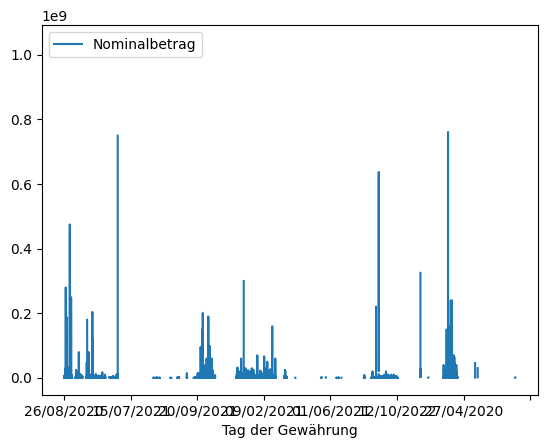

In [9]:
frame.plot(x="Tag der Gewährung", y=["Nominalbetrag"])

<Axes: xlabel='Tag der Gewährung'>

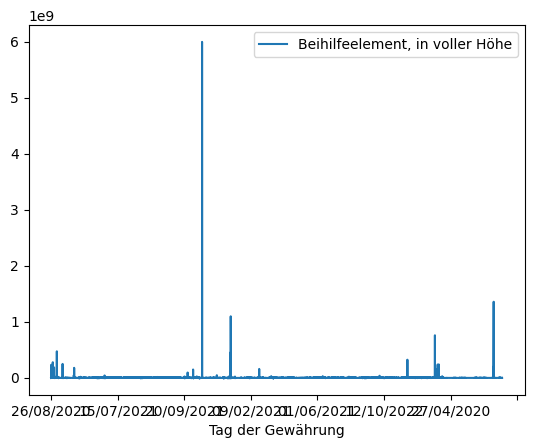

In [10]:

frame.plot(x="Tag der Gewährung", y=["Beihilfeelement, in voller Höhe"])

In [11]:
frame["Tag der Gewährung"] = pd.to_datetime(frame["Tag der Gewährung"], infer_datetime_format=True)

<Axes: xlabel='Tag der Gewährung'>

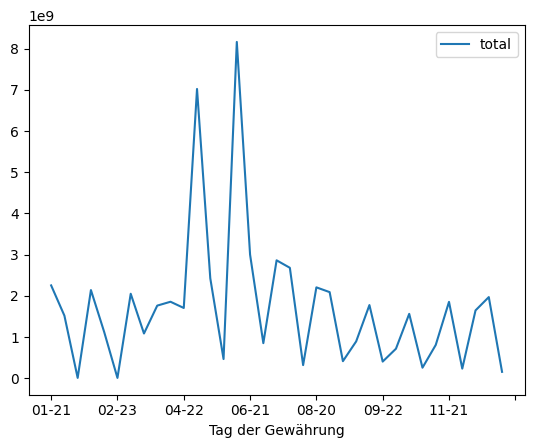

In [13]:
frame.groupby(frame["Tag der Gewährung"].dt.strftime('%m-%y')).agg (total = ("Beihilfeelement, in voller Höhe" , 'sum')).plot()

In [88]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/all_companies.csv', index=False, header=True)

In [155]:
frame = frame[['Name des Beihilfeempfängers','Nationale Kennung']].drop_duplicates()
frame = frame.reset_index(drop=True, names='index')
frame.index = frame.index.rename('Index')
frame['Status'] = ''
frame

,Name des Beihilfeempfängers,Nationale Kennung,Status
Index,,,
0,Eurocaribe Druck und Verlag GnbH,45/719/00411,
1,K-motion GmbH & Co. KG,43/637/00859,
2,Künstlermanagement Uwe Kanthak,48/635/01062,
3,Do it! Sprachreisen OHG,42/613/02646,
4,HCK Holding GmbH,48/747/06065,
...,...,...,...
102978,Milchproduktion Kreinitz GmbH,Betriebsnummer 6273600025,
102979,Jürgen Schirra,Betriebsnummer 072351140011,
102980,Milchproduktion Wildenborn KG,HRA 34143 Stendal,


In [159]:
frame.to_csv(r'/Users/marco/Library/CloudStorage/OneDrive-HertieSchool/Thesis/GitHub/thesis/data/main/companies.csv', sep='$' , index=True, header=True)

In [158]:
frame.shape

(102983, 3)